## Tech Challenge: **Classificação de Saúde Fetal**

Dados
Este conjunto de dados contém 2.126 registros de características extraídas de exames de cardiotocograma, que foram então classificados por três obstetras especialistas em três categorias:


---


**Descrição dos Atributos (Colunas):**
1. Baseline value – frequência cardíaca basal (batimentos por minuto).
2. Accelerations – acelerações por segundo
3. Fetal movement – movimentos fetais por segundo
4. Uterine contractions – contrações uterinas por segundo
5. Light decelerations – desacelerações leves por segundo
6. Severe decelerations – desacelerações severas por segundo
7. Prolonged decelerations – desacelerações prolongadas por segundo
8. Abnormal short‑term variability – % de tempo com variabilidade de curto prazo anormal
9. Mean value of short‑term variability – valor médio da variabilidade de curto prazo
10. % abnormal long‑term variability – % de tempo com variabilidade de longo prazo anormal
11. Mean value of long‑term variability – valor médio da variabilidade de longo prazo
12. Histogram width – largura do histograma de FHR
13. Histogram min – valor mínimo no histograma de FHR
14. Histogram max – valor máximo no histograma de FHR
15. Histogram number of peaks – número de picos no histograma
16. Histogram number of zeros – número de zeros no histograma
17. Histogram mode – valor modal do histograma
18. Histogram mean – média do histograma
19. Histogram median – mediana do histograma
20. Histogram variance – variância do histograma
21. Histogram tendency – tendência (skewness ou direção) do histograma de FHR
22. Fetal health – label da classe: 1.0 → Normal | 2.0 → Suspect | 3.0 → Pathologica



---
Grupo:


1.   Bruna Cardoso Andrade - RM366295
2.   Felipe de Siqueira Zanella -
3.   Vinicius de Souza Medeiros -
4.   Horacy Lopes da Silva Junior - RM365525
5.   Gabriel Luiz Santana -



---

Link do dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification


# **Importação de bibliotecas**

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
import shap

# **Carregamento dos dados**

In [102]:
df = pd.read_csv('fetal_health.csv')
display(df.head())

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# **Pré-processamento dos dados 01**

In [103]:
# Tratamento dos dados nulos
print("Dados nulos:")
print(df.isnull().sum())

Dados nulos:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode             

In [104]:
# Tratamento dos dados duplicados
print("Dados duplicados:")
print(df.duplicated().sum())
df.shape

Dados duplicados:
13


(2126, 22)

In [105]:
# Remover dados duplicados
df = df.drop_duplicates()

In [106]:
print("Dados duplicados:")
print(df.duplicated().sum())

df.shape

Dados duplicados:
0


(2113, 22)

In [107]:
# Renomeia a coluna fetal_health -> target
df = df.rename(columns={'fetal_health': 'target'})

In [108]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# **Análise exploratória dos dados**

In [109]:
# Verificação da quantidade de linhas e colunas do dataset, e dos tipos de dados presente nele;
# Como não há nenhum dado string, não é necessário alterar para valores inteiros
print("Shape (linhas, colunas):", df.shape)
print("\nTipos de dados:\n", df.dtypes)

Shape (linhas, colunas): (2113, 22)

Tipos de dados:
 baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_pe

In [110]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2113 non-null   float64
 1   accelerations                                           2113 non-null   float64
 2   fetal_movement                                          2113 non-null   float64
 3   uterine_contractions                                    2113 non-null   float64
 4   light_decelerations                                     2113 non-null   float64
 5   severe_decelerations                                    2113 non-null   float64
 6   prolongued_decelerations                                2113 non-null   float64
 7   abnormal_short_term_variability                         2113 non-null   float64
 8   mean_value_of_short_term_variability       

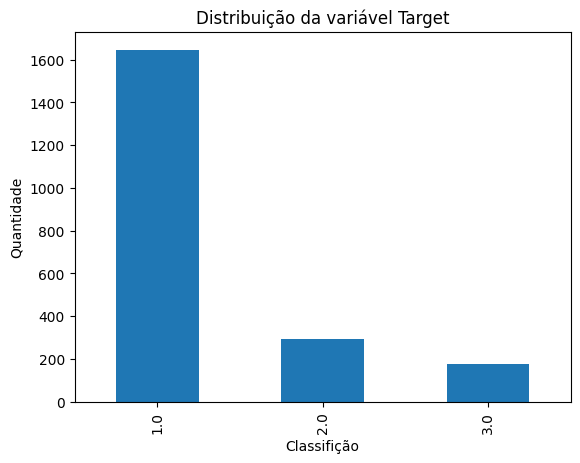

In [112]:
# Distribuição da variável Target
df['target'].value_counts().plot(kind='bar')
plt.title("Distribuição da variável Target")
plt.xlabel("Classifição")
plt.ylabel("Quantidade")
plt.show()

# A partir da distribuição da variável target, é possível perceber que esse dataset é desbalenceado. Já que a maior parte dos dados são classificados como Normal.

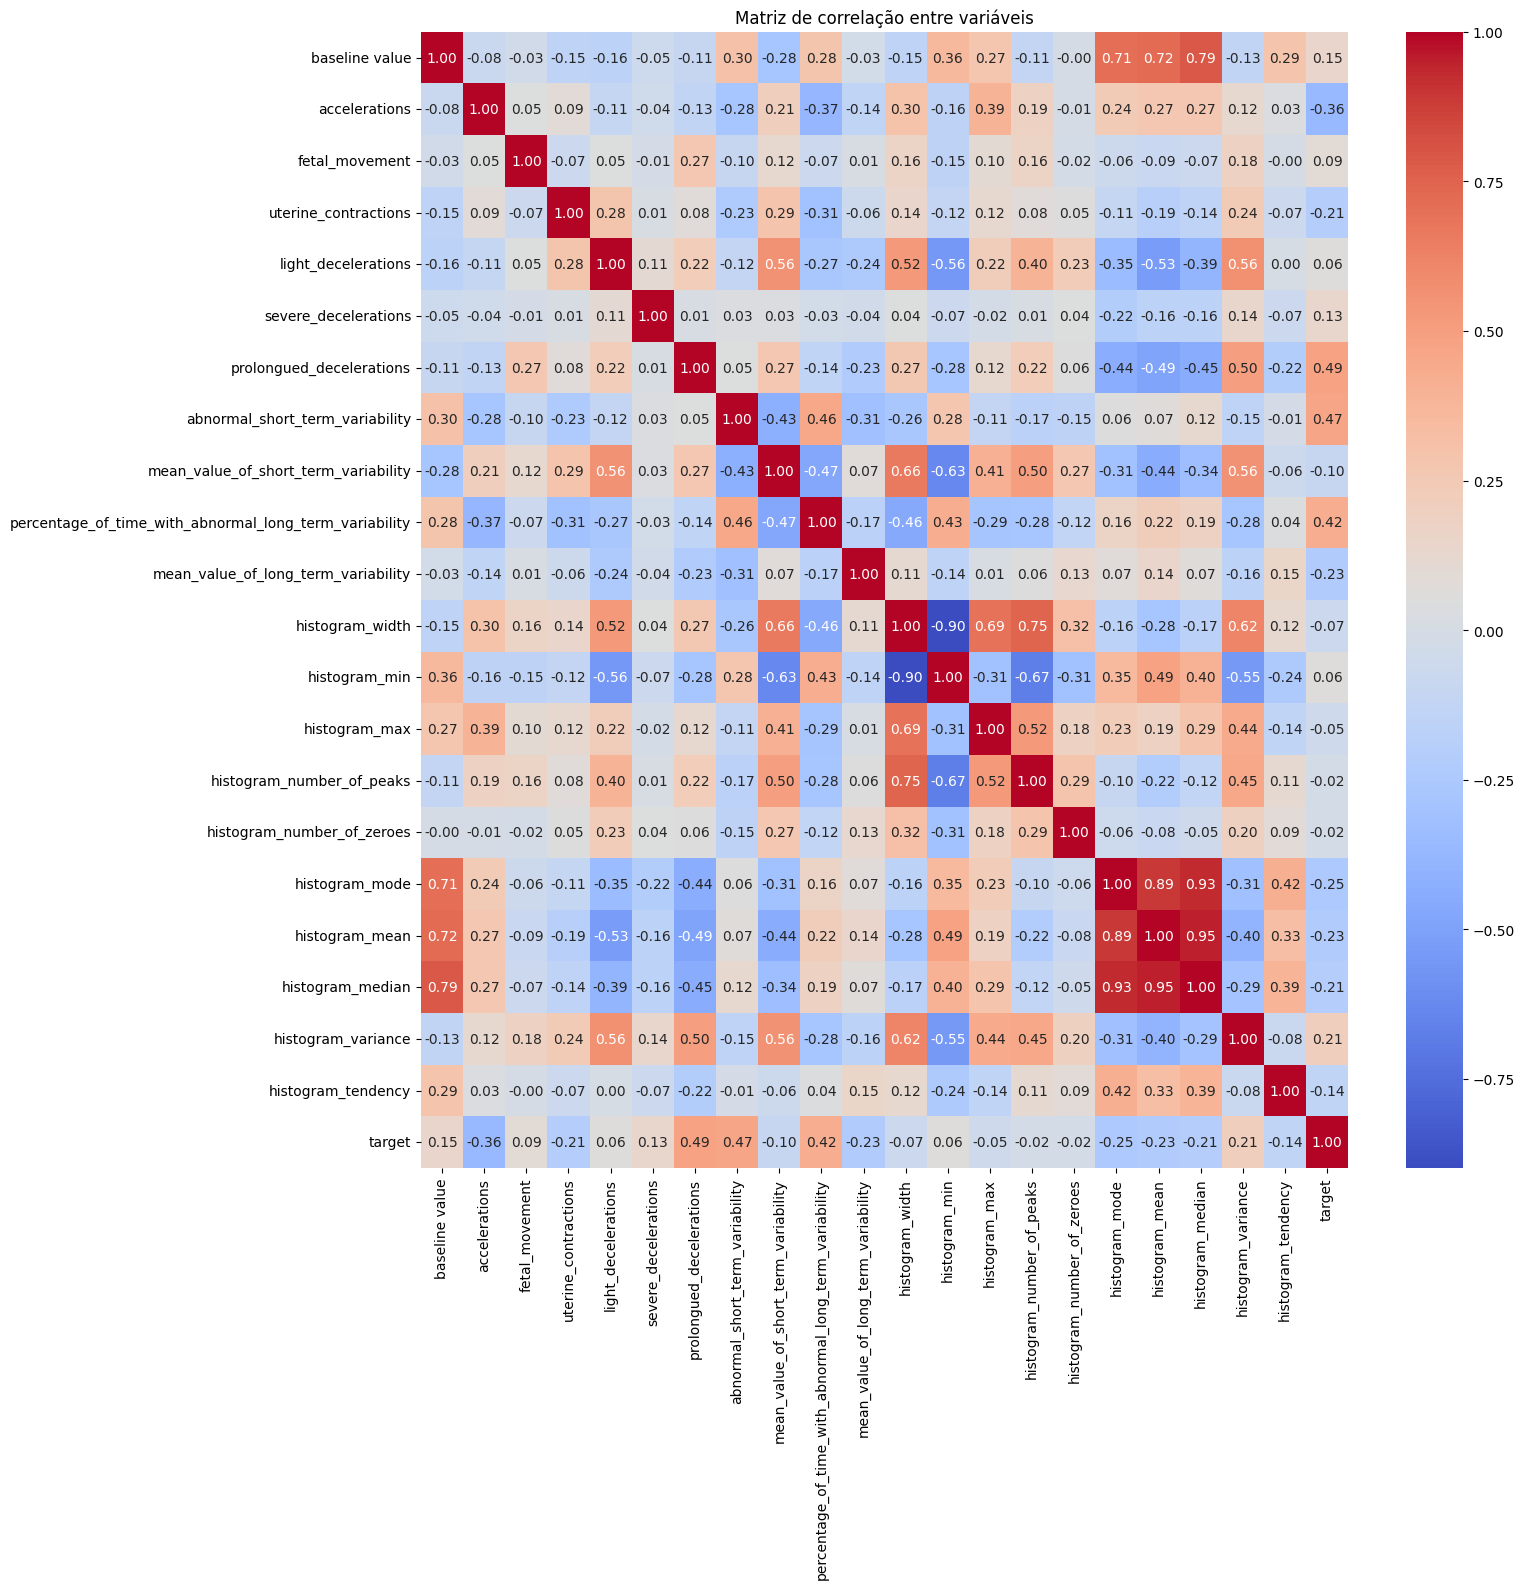

In [113]:
# Matriz de correlação - Compara todas as colunas numéricas entre si.
correlation_matrix = df.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlação entre variáveis')
plt.tight_layout()
plt.show()

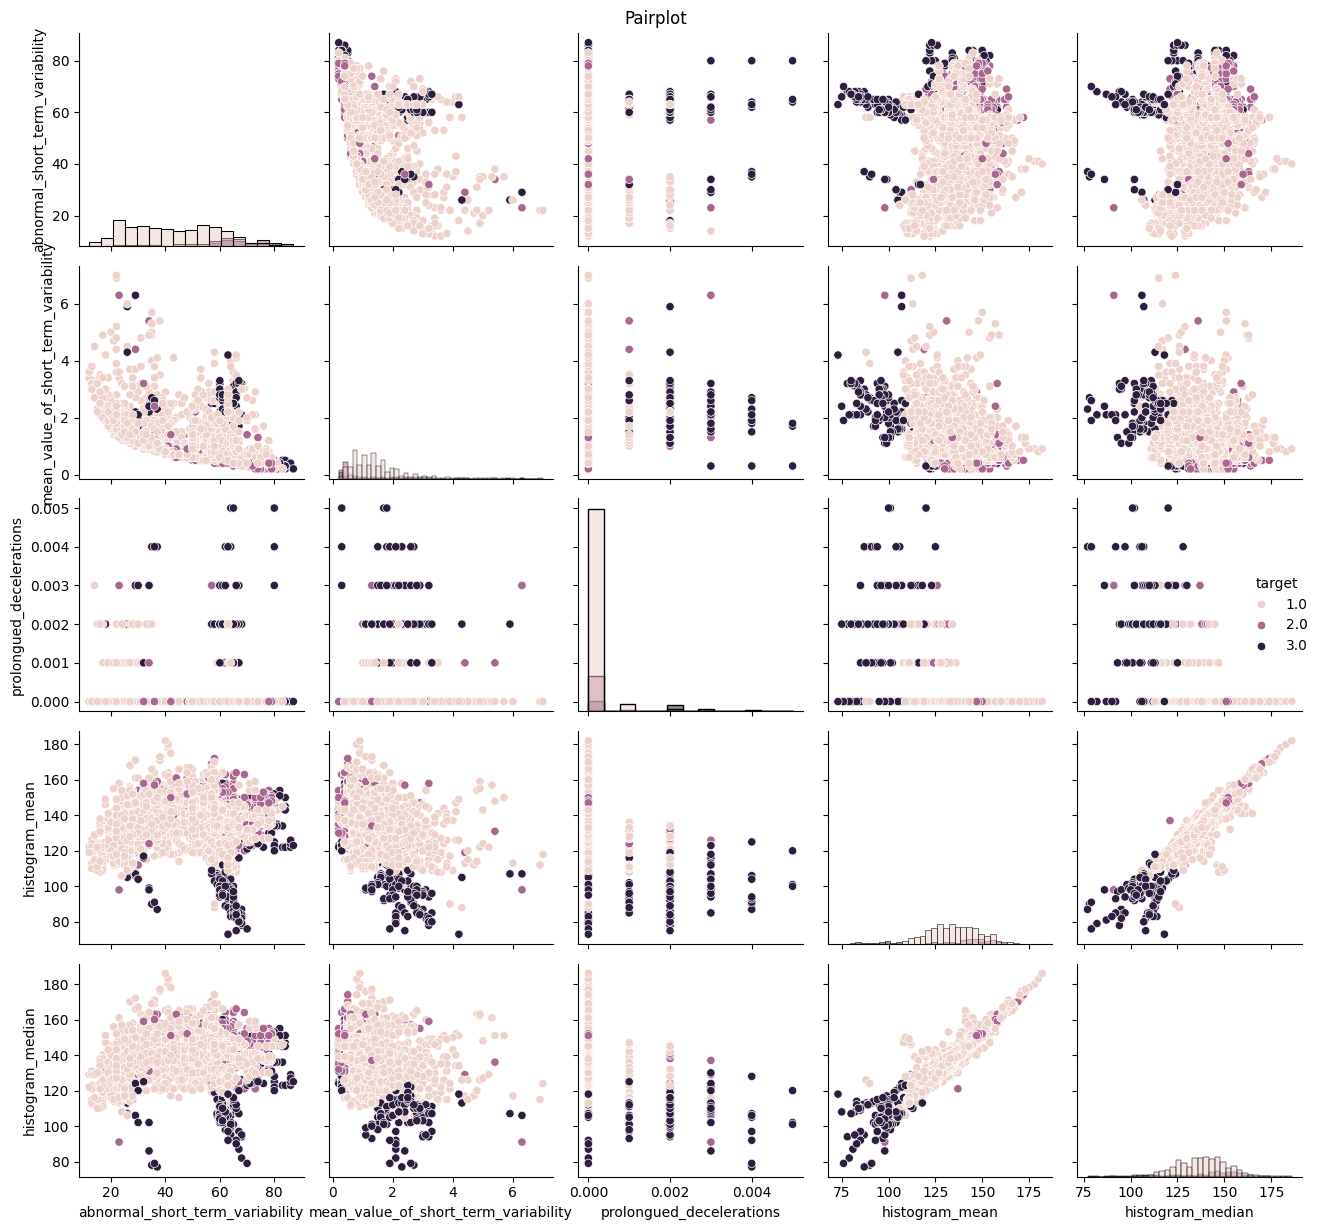

In [114]:
# As variáveis com maior correlação
# - abnormal_short_term_variability:	0.62
# - mean_value_of_short_term_variability:	–0.53
# - prolongued_decelerations:	0.49
# - histogram_mean:	–0.39
# - histogram_median:	–0.36

# Selecionar as variáveis mais correlacionadas com 'target'
correlation_cols = [
    'abnormal_short_term_variability',
    'mean_value_of_short_term_variability',
    'prolongued_decelerations',
    'histogram_mean',
    'histogram_median',
    'target'
]

# Gerar o pairplot
sns.pairplot(df[correlation_cols], hue='target', diag_kind='hist')
plt.suptitle("Pairplot")
plt.tight_layout()
plt.show()

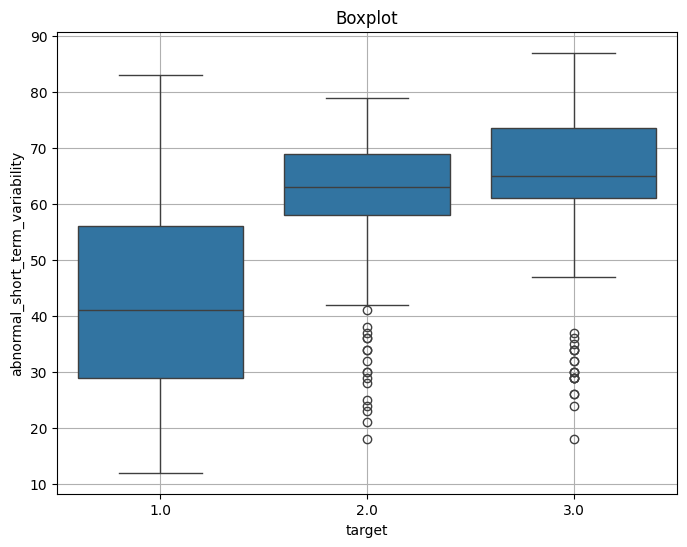

In [115]:
# Boxplot da 'abnormal_short_term_variability'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='abnormal_short_term_variability')
plt.title("Boxplot")
plt.grid(True)
plt.show()

# Interpretação:
# Valores da abnormal_short_term_variability e a distribuição geral aumentam conforme o target vai de 1 → 2 → 3.
# Isso sugere que maior variabilidade anormal de curto prazo está associada a maior risco fetal, apesar de existir alguns outliers

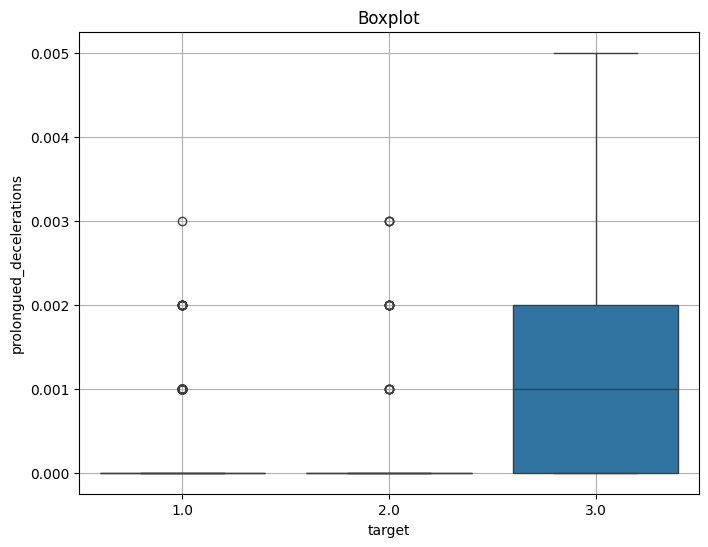

In [116]:
# Boxplot da 'prolongued_decelerations'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='target', y='prolongued_decelerations')
plt.title("Boxplot")
plt.grid(True)
plt.show()


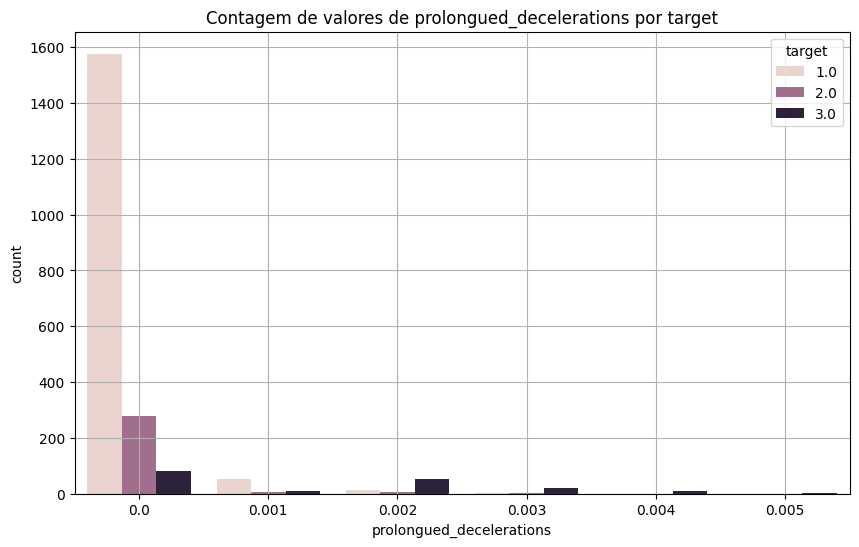

In [117]:
# Gráfico de contagem de valores de 'prolongued_decelerations' por classe 'target'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='prolongued_decelerations', hue='target')
plt.title("Contagem de valores de prolongued_decelerations por target")
plt.grid(True)
plt.show()

# Interpretação Boxplot + Contagem
# A maioria dos valores é zero, especialmente nas classes 1 e 2. Já a classe 3 apresenta uma maior frequência de valores diferentes de zero.
# A classe 3 tende a apresentar maior incidência de desacelerações prolongadas, o que faz sentido do ponto de vista clínico: desacelerações prolongadas estão associadas a sofrimento fetal.

**Pesquisa:** Em monitoramento fetal, desacelerações prolongadas referem-se a reduções significativas e sustentadas na frequência cardíaca fetal (FCF) que duram mais de dois minutos, mas menos de dez, em relação à linha de base.
Essas desacelerações podem indicar sofrimento fetal e são consideradas um achado não tranquilizador, exigindo avaliação e intervenção rápidas.

[link pesquisa](https://www.aafp.org/pubs/afp/issues/2020/0801/p158.html#:~:text=Desacelera%C3%A7%C3%B5es%20prolongadas%20da%20FCF%20em,recomenda%2Dse%20o%20parto%20imediato.&text=FIGURA%207.&text=Desacelera%C3%A7%C3%B5es%20prolongadas%20da%20frequ%C3%AAncia%20card%C3%ADaca%20fetal.)

# **Separação modelo Feature e Target + Pipeline de pré-processamento**

In [118]:
# Separar features e target
X = df.drop("target", axis=1)
y = df["target"]

In [119]:
# Pipeline de pré-processamento dos dados
# Explicação: Para evitar que atributos com valores grandes dominem a modelagem, foi usado o StandardScaler() para padronizar os dados com média 0 e desvio padrão 1.

x_coluns = X.columns.tolist()

# Pipeline de escalonamento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), x_coluns)
])

# **Divisão entre treino e teste**

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# **Aplicação SMOTE**

O SMOTE é uma técnica de oversampling utilizada para balancear conjuntos de dados desbalanceados, especialmente em problemas de classificação.

Em vez de duplicar exemplos da classe minoritária (como o oversampling ingênuo), o SMOTE cria novas amostras sintéticas ao interpolar entre instâncias existentes da classe minoritária.

[link pesquisa smote](https://learn.microsoft.com/pt-br/azure/machine-learning/component-reference/smote?view=azureml-api-2)

In [121]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

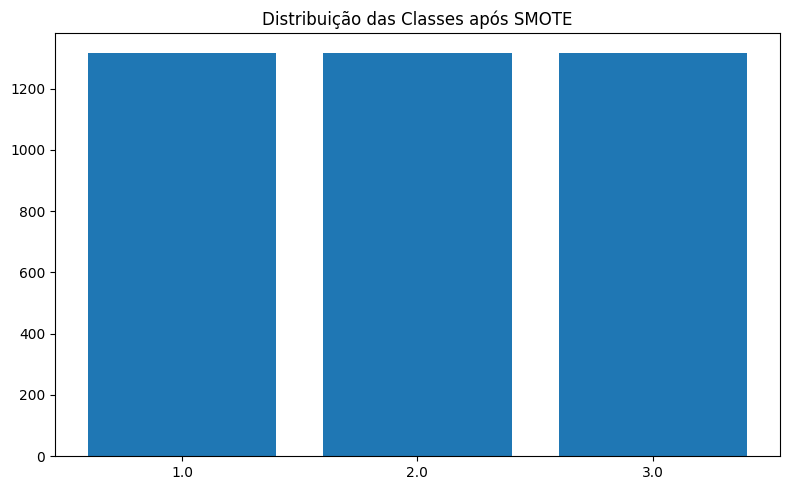

In [122]:
# Distribuição das calsses após a aplicação do SMOTE, é possível ter um dataset balanceado.
contagem = y_resampled.value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(contagem.index.astype(str), contagem.values)
plt.title('Distribuição das Classes após SMOTE')
plt.tight_layout()
plt.show()

# Modelagem - Treinamento - Avaliação: **Multiplas Árvores de decisão**(RandomForestClassifier)

In [123]:
# Pipeline final: transforma os dados com `transformer` e aplica o classificador

random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Treina com os dados balanceados
random_forest_pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['baseline value',
                                                   'accelerations',
                                                   'fetal_movement',
                                                   'uterine_contractions',
                                                   'light_decelerations',
                                                   'severe_decelerations',
                                                   'prolongued_decelerations',
                                                   'abnormal_short_term_variability',
                                                   'mean_value_of_short_term_variability',
                                                   'percentage_of_time_with_abnormal_long_term_variability',
                                                   'mean_value_of_long_term_variability',
                                                   'histogram_width',
                                                   'histogram_min',
                                                   'histogram_max',
                                                   'histogram_number_of_peaks',
                                                   'histogram_number_of_zeroes',
                                                   'histogram_mode',
                                                   'histogram_mean',
                                                   'histogram_median',
                                                   'histogram_variance',
                                                   'histogram_tendency'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [124]:
#  Avalia predicao no conjunto de teste original
y_pred_random_forest = random_forest_pipeline.predict(X_test)

**Avaliação do modelo com métricas de Avaliação**

In [125]:
# Accuracy mede o percentual de classificações corretas sobre o total.
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Acurácia com Árvore de decisão: \n", accuracy_random_forest)

# Recall (taxa de verdadeiro positivo) representa a média do recall para cada classe, importante quando há desequilíbrio.
recall_random_forest = recall_score(y_test, y_pred_random_forest, average='macro')
print("Taxa de verdadeiro positivo com Árvore de decisão: \n", recall_random_forest)

f1_random_forest = f1_score(y_test, y_pred_random_forest, average='macro')
report = classification_report(y_test, y_pred_random_forest, output_dict=True)
print("F1-score com Árvore de decisão: \n", f1_random_forest)


Acurácia com Árvore de decisão: 
 0.9408983451536643
Taxa de verdadeiro positivo com Árvore de decisão: 
 0.872453600039807
F1-score com Árvore de decisão: 
 0.8891705539131077


**Interpretação:**


*   Acurácia: O modelo acertou 94,3% das amostras no conjunto de teste.
*   Recall: O modelo consegue identificar corretamente cerca de 88,8% dos exemplos de cada classe, em média.
*   F1: O modelo com 89,8% mostra que mantém um bom equilíbrio entre precisão e recall em todas as classes.

**Interpretação dos resultados com feature importance**

In [126]:
result_random_forest = permutation_importance(random_forest_pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Cria dicionário com os nomes das colunas e suas importâncias
feature_importances_random_forest = dict(zip(X.columns, result_random_forest.importances_mean))

df_importance_random_forest = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result_random_forest.importances_mean
}).sort_values(by='Importance', ascending=False)

print(df_importance_random_forest.head(5))

                                              Feature  Importance
7                     abnormal_short_term_variability    0.039716
1                                       accelerations    0.026950
17                                     histogram_mean    0.015130
9   percentage_of_time_with_abnormal_long_term_var...    0.014657
18                                   histogram_median    0.011348


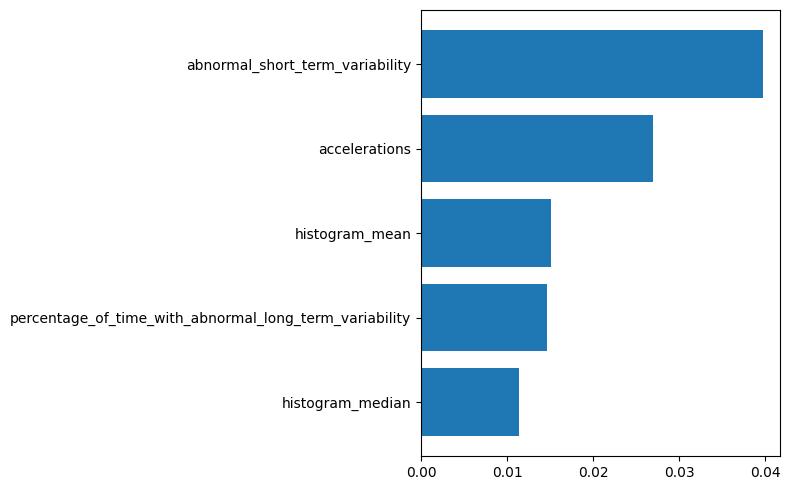

In [127]:
# Selecionar apenas as 5 variáveis mais importantes
top5_random_forest = df_importance_random_forest.head(5)

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top5_random_forest["Feature"], top5_random_forest["Importance"])
ax.invert_yaxis()
plt.tight_layout()
plt.show()

**Interpretação:**
Foi usada a técnica Permutation Importance para entender as 5 variaveis mais importantes na performance do modelo depois que já foi treinado.

*   abnormal_short_term_variability teve o maior impacto na performance do modelo, sendo a variável mais relevante.
*   accelerations e percentage_of_time_with_abnormal_long_term_variability também são altamente influentes nas predições.



Interpretação dos resultados com SHAP

*   SHAP é uma técnica que calcula quanto cada feature contribuiu para a predição de um modelo, para cada instância individual. O objetivo é explicar a previsão de um modelo como a soma das contribuições de cada feature.


<Figure size 640x480 with 0 Axes>

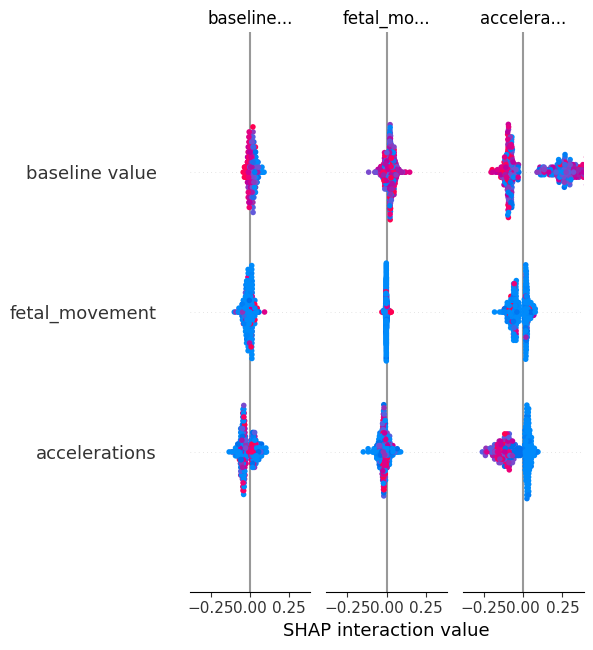

In [128]:
# SHAP

model = random_forest_pipeline.named_steps['classifier']
X_test_transformed = random_forest_pipeline.named_steps['preprocessor'].transform(X_test)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_transformed)

plt.figure()
shap.summary_plot(
    shap_values[1] if isinstance(shap_values, list) else shap_values,
    features=X_test_transformed,
    feature_names=X.columns,
    show=False
)
plt.tight_layout()
plt.show()

**Interpretação:**
O gráfico mostra interações entre pares de variáveis — ou seja, como duas variáveis juntas afetam a predição.

* Eixo Y (linhas): Cada linha representa uma variável principal envolvida em interações.

* Pontos coloridos (azul/rosa): Cada ponto representa uma instância do dataset de teste.

* Eixo X: Valor da contribuição de interação SHAP para a predição.
 * Valores positivos empurram a predição para cima (ex: maior chance de classe positiva).
 * Valores negativos puxam para baixo.

* Cores dos pontos (azul/rosa): Indicam os valores das variáveis com as quais a variável principal interage.
  * Azul: valor baixo da feature de interação.
  * Rosa: valor alto da feature de interação.


**Na prática:**
* A feature accelerations tem interações bem centradas em 0 → baixo impacto conjunto.
* A feature fetal_movement tem interações que às vezes puxam a predição para cima e outras para baixo → impacto relevante e variável.
* O padrão de dispersão mostra a variabilidade e intensidade das interações.

# Modelagem - Treinamento - Avaliação: **KNN**(K-Nearest Neighbors)

Text(0, 0.5, 'Mean Error')

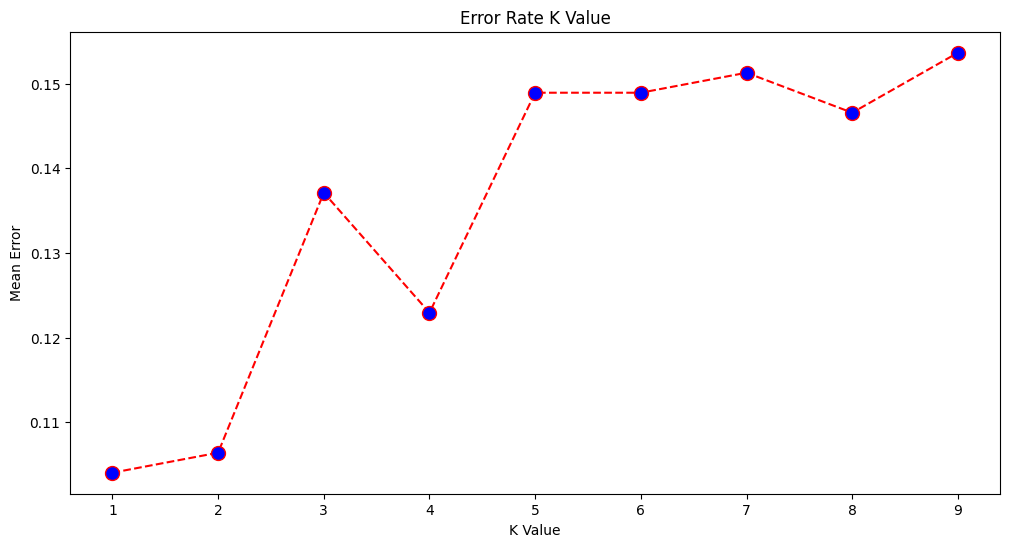

In [129]:
# Funcao para definir o K
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_resampled , y_resampled)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [140]:
# Pipeline final: transforma os dados com preprocessor e aplica o classificador

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# Treina com os dados balanceados
knn_pipeline.fit(X_resampled, y_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['baseline value',
                                                   'accelerations',
                                                   'fetal_movement',
                                                   'uterine_contractions',
                                                   'light_decelerations',
                                                   'severe_decelerations',
                                                   'prolongued_decelerations',
                                                   'abnormal_short_term_variability',
                                                   'mean_value_of_short_term_variability',
                                                   'percentage_of_time_with_abnormal_long_term_variability',
                                                   'mean_value_of_long_term_variability',
                                                   'histogram_width',
                                                   'histogram_min',
                                                   'histogram_max',
                                                   'histogram_number_of_peaks',
                                                   'histogram_number_of_zeroes',
                                                   'histogram_mode',
                                                   'histogram_mean',
                                                   'histogram_median',
                                                   'histogram_variance',
                                                   'histogram_tendency'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [169]:
#  Avalia predicao no conjunto de teste original
y_pred_knn = knn_pipeline.predict(X_test)

**Avaliação do modelo com métricas de Avaliação**

In [170]:
# Accuracy mede o percentual de classificações corretas sobre o total.
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Acurácia com Árvore de decisão: \n", accuracy_knn)

# Recall (taxa de verdadeiro positivo) representa a média do recall para cada classe, importante quando há desequilíbrio.
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
print("Taxa de verdadeiro positivo com Árvore de decisão: \n", recall_knn)

f1_knn = f1_score(y_test, y_pred_knn, average='macro')
print("F1-score com Árvore de decisão: \n", f1_knn)


Acurácia com Árvore de decisão: 
 0.8959810874704491
Taxa de verdadeiro positivo com Árvore de decisão: 
 0.8523660247798178
F1-score com Árvore de decisão: 
 0.8234218469267871


**Interpretação:**


*   Acurácia: O modelo acertou 89,8% das amostras no conjunto de teste.
*   Recall: O modelo consegue identificar corretamente cerca de 82,49% dos exemplos de cada classe, em média.
*   F1: O modelo com 82,33% mostra que mantém um bom equilíbrio entre precisão e recall em todas as classes.

Avaliação dos resultados com SHAP

*   SHAP é uma técnica que calcula quanto cada feature contribuiu para a predição de um modelo, para cada instância individual. O objetivo é explicar a previsão de um modelo como a soma das contribuições de cada feature.


  0%|          | 0/423 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

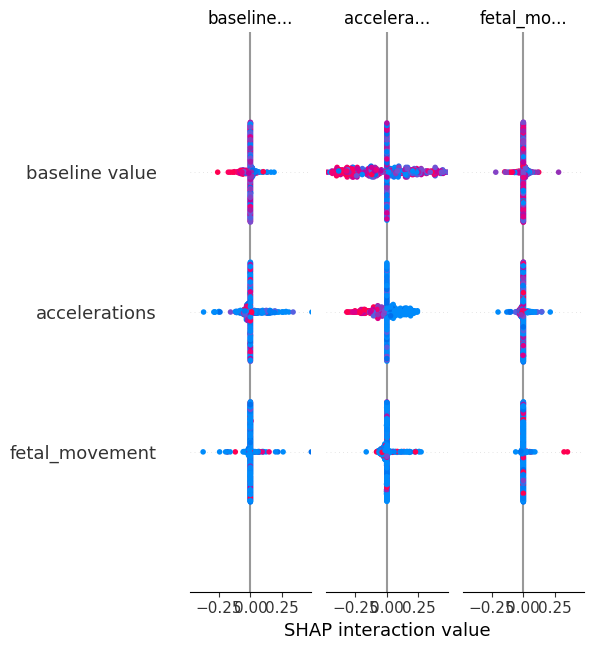

In [145]:
# SHAP

X_test_transformed_knn = knn_pipeline.named_steps['preprocessor'].transform(X_test)
model_knn = knn_pipeline.named_steps['classifier']
predict_fn = lambda x: model_knn.predict_proba(x)

background = shap.sample(X_test_transformed_knn, 100)
explainer_knn = shap.KernelExplainer(predict_fn, background)

shap_values_knn = explainer_knn.shap_values(X_test_transformed_knn, nsamples=100)

# Plot do gráfico SHAP
plt.figure()
shap.summary_plot(
    shap_values_knn[1] if isinstance(shap_values_knn, list) else shap_values_knn,
    features=X_test_transformed_knn,
    feature_names=X.columns,
    show=False
)
plt.tight_layout()
plt.show()

**Interpretação:**
O gráfico mostra interações entre pares de variáveis — ou seja, como duas variáveis juntas afetam a predição.

* Eixo Y (linhas): Cada linha representa uma variável principal envolvida em interações.

* Pontos coloridos (azul/rosa): Cada ponto representa uma instância do dataset de teste.

* Eixo X: Valor da contribuição de interação SHAP para a predição.
 * Valores positivos empurram a predição para cima (ex: maior chance de classe positiva).
 * Valores negativos puxam para baixo.

* Cores dos pontos (azul/rosa): Indicam os valores das variáveis com as quais a variável principal interage.
  * Azul: valor baixo da feature de interação.
  * Rosa: valor alto da feature de interação.


**Na prática:**
1. baseline_value: Os pontos estão quase todos concentrados no meio (em torno do SHAP = 0), indicando que essa variável tem pouca influência nas decisões do modelo. A cor está misturada e distribuída simetricamente, o que reforça que valores altos e baixos impactam pouco.

2. accelerations: Mais concentrado, mas com uma leve inclinação: valores mais baixos (azuis) tendem a puxar a predição para o lado negativo (esquerda). Valores mais altos (rosas) tendem a puxar mais para o lado positivo (direita). Ou seja, mais acelerações fetais podem estar associadas à classe positiva (possivelmente não saudável).




# **Resultados e Comparação dos modelos de Treinamento (RandomForest X Knn)**


**Comparação**

*  Random Forest supera o KNN em quase todos os aspectos, especialmente no equilíbrio entre precisão e recall.
  * Acurácia geral maior: 94% vs 90%
  * F1-score macro é maior: 0.89 vs 0.82
*  KNN sofre mais com classes minoritárias, pois é sensível à distribuição dos dados e à escolha de k.

*  Random Forest é mais robusto, pois consegue capturar relações complexas entre as variáveis e lida melhor com desequilíbrios.

In [171]:
rf_report = classification_report(y_test, y_pred_random_forest)
knn_report = classification_report(y_test, y_pred_knn)

print("Random Forest: \n", rf_report)
print()
print("KNN: \n", knn_report)


Random Forest: 
               precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       330
         2.0       0.87      0.69      0.77        58
         3.0       0.92      0.94      0.93        35

    accuracy                           0.94       423
   macro avg       0.91      0.87      0.89       423
weighted avg       0.94      0.94      0.94       423


KNN: 
               precision    recall  f1-score   support

         1.0       0.97      0.92      0.95       330
         2.0       0.61      0.81      0.70        58
         3.0       0.83      0.83      0.83        35

    accuracy                           0.90       423
   macro avg       0.80      0.85      0.82       423
weighted avg       0.91      0.90      0.90       423



**Modelo na Prática:**

1. Auxílio no diagnóstico inicial
  * O modelo pode funcionar como um sistema de triagem para sinalizar casos de possível sofrimento fetal com base nos dados cardiotocográficos.Isso pode permitir que os profissionais priorizem exames suspeitos e reduzam o tempo de resposta em situações críticas.

2. Redução de erros humanos
  * O modelo pode alertar sobre padrões que passariam despercebidos em análises manuais, especialmente em grandes volumes de exames.

3. Monitoramento contínuo
  * Em um cenário com monitoramento fetal em tempo real, o modelo pode ser embutido em um sistema que emita alertas automáticos quando forem detectados sinais de risco.

**Limitações e necessidade de supervisão médica:**

1. Responsabilidade ética e legal: O modelo não deve tomar decisões finais. Cabe sempre ao médico avaliar o contexto clínico completo, histórico da paciente e outros exames.

2. Variabilidade dos dados clínicos: O modelo foi treinado com uma base pública. Na prática, pode haver variações em equipamentos, populações ou protocolos hospitalares.

3. Explicabilidade do modelo: A interpretação dos resultados por meio das técnicas de avaliação é importante para que médicos compreendam as decisões do modelo.

**Conclusão:**

O modelo é aplicável na prática como ferramenta de suporte à decisão clínica, oferecendo insights adicionais com base em dados históricos e algoritmos de aprendizado de máquina. No entanto, a palavra final sempre deve ser do médico responsável pelo atendimento.